In [1]:
import numpy as np
import pandas as pd

In [11]:
data = pd.read_csv('winequality-red.csv')
data.head(500)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.9972,3.15,0.65,11.0,8
496,7.8,0.52,0.25,1.9,0.081,14.0,38.0,0.9984,3.43,0.65,9.0,6
497,7.2,0.34,0.32,2.5,0.090,43.0,113.0,0.9966,3.32,0.79,11.1,5
498,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.9972,3.15,0.65,11.0,8


In [12]:
data.shape

(1599, 12)

In [13]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
# converting quality column, if quality is greater than or equal to 7 to be 1 else 0
data['quality']=data['quality'].apply(lambda x: 1 if x>=7 else 0)
data['quality'].head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

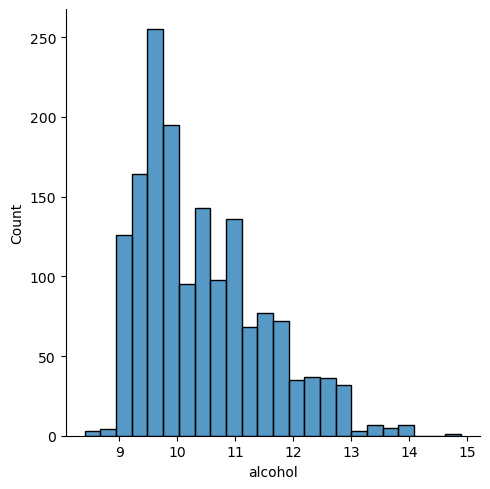

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(df.alcohol)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()
scaled_x = pd.DataFrame(scale.fit_transform(data),columns = data.columns)
scaled_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.0


In [21]:
X = scaled_x.drop('quality', axis=1)
Y = scaled_x.quality

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=40, test_size=0.4)
print(X_train.shape, X_test.shape)

(959, 11) (640, 11)


In [34]:
from sklearn.ensemble import RandomForestClassifier
model2 =RandomForestClassifier(criterion='entropy')

In [35]:
model2.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy')

In [31]:
r_y_predict = model2.predict(X_test)
r_y_predict_train = model2.predict(X_train)
check = pd.DataFrame({'actual quality':Y_test,'predicted quality':r_y_predict})
check     

,actual quality,predicted quality
1035,1.0,0.0
49,0.0,0.0
799,0.0,0.0
538,1.0,0.0
660,0.0,0.0
...,...,...
248,0.0,0.0
1219,0.0,0.0
1586,0.0,0.0
401,0.0,0.0


In [37]:
pd.crosstab(Y_test,r_y_predict)


col_0,0.0,1.0
quality,,
0.0,532,16
1.0,43,49


In [41]:
import sklearn.metrics
print('Testing Accuracy = ', sklearn.metrics.accuracy_score(Y_test,r_y_predict))
print('Training Accuracy = ', sklearn.metrics.accuracy_score(Y_train,r_y_predict_train))

Testing Accuracy =  0.9078125
Training Accuracy =  1.0
